This notebooks is for working with the data that was balanced by SMOTE.

## 4. Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Let's read the pre-porcessed data.

In [2]:
network_df2=pd.read_csv('network_preprocessed.csv')

In [3]:
network_df2.shape

(2160668, 23)

### 4.1 Split the dataset into train and test

In [4]:
network_df2.head()

X=network_df2.drop(columns='PKT_CLASS')
y=network_df2['PKT_CLASS']

In [5]:
X.head()

,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,NUMBER_OF_PKT,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,...,LAST_PKT_RESEVED,pkt_type__cbr,pkt_type__ping,pkt_type__tcp,to__Router,to__Server,to__Switch,from__Router,from__Server,from__Switch
0,1540,1,4,11339,16091,0.0,328.240918,505490.0,0.236321,0.0,...,50.021920,0,0,1,1,0,0,0,0,1
1,1540,1,16,6274,16092,0.0,328.205808,505437.0,0.236337,0.0,...,50.030211,0,0,1,0,1,0,1,0,0
2,55,1,16,1930,16092,0.0,328.206042,18051.3,0.008441,0.0,...,50.060221,0,0,0,0,0,1,1,0,0
3,55,1,10,12670,16085,0.0,328.064183,18043.5,0.008437,0.0,...,50.060098,0,0,0,0,0,1,1,0,0
4,55,1,9,4901,16088,0.0,328.113525,18046.2,0.008438,0.0,...,50.061864,0,0,0,0,0,1,1,0,0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34, stratify=y)

In [123]:
X_train

,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,NUMBER_OF_PKT,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,...,LAST_PKT_RESEVED,pkt_type__cbr,pkt_type__ping,pkt_type__tcp,to__Router,to__Server,to__Switch,from__Router,from__Server,from__Switch
2100196,1000,1,39,933,6250,0.000000,124.941028,124941.0,0.059605,0.001403,...,75.023600,1,0,0,0,0,1,0,0,0
2114100,1000,1,39,2872,6250,0.000640,124.941028,124941.0,0.059605,0.001352,...,75.023600,1,0,0,1,0,0,0,0,1
1241396,1540,1,13,12011,16103,0.000124,328.491489,505876.0,0.236498,0.000124,...,50.021057,0,0,1,0,1,0,1,0,0
1959122,1540,1,1,6981,16091,0.000000,328.316229,505606.0,0.236321,0.000000,...,50.010675,0,0,1,1,0,0,0,0,1
1906327,1540,1,13,10667,16103,0.000000,328.491489,505876.0,0.236498,0.000385,...,50.021057,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443970,55,1,16,4214,16092,0.000000,328.206042,18051.3,0.008441,0.000000,...,50.060221,0,0,0,0,0,1,1,0,0
1764302,55,1,3,5220,16091,0.000000,328.264120,18054.5,0.008440,0.000000,...,50.048477,0,0,0,0,0,1,1,0,0
1271868,692,1,22,395,9108,0.003065,1016.542930,703448.0,0.060108,0.036351,...,9.959779,1,0,0,0,1,0,1,0,0
174628,55,1,13,14996,16103,0.000000,328.491596,18067.0,0.008446,0.000000,...,50.051067,0,0,0,0,0,0,0,0,1


 ### 4.2 Balance the target class using SMOTE

In [7]:
from imblearn.over_sampling import SMOTE

# Define the SMOTE
smote = SMOTE(random_state=42)

# Fit and apply the undersampler to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Now X_train_resampled and y_train_resampled contain the balanced dataset

In [8]:
X_train.shape

(1512467, 22)

In [9]:
X_train_resampled.shape

(2710342, 22)

In [10]:
y_train_resampled.shape

(2710342,)

In [11]:
y_train_resampled.value_counts()

0    1355171
1    1355171
Name: PKT_CLASS, dtype: int64

The training set was resampled by increasing data points of positive class.

### 4.3 Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_resampled)

# Transform both the training and testing data using the fitted scaler
X_train_scaled = scaler.transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler fitted on X_train

In [40]:
X_train_resampled.shape

(2710342, 22)

### 4.4 PCA

After scaling, let's see how the positive and negative classes look like on the 2D and 3D space

In [14]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=3)

In [43]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [13]:
X_test_pca = pca.transform(X_test_scaled)

In [44]:
# Optionally, let's examine the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

Explained variance ratio: [0.31741086 0.23039593 0.08619765]


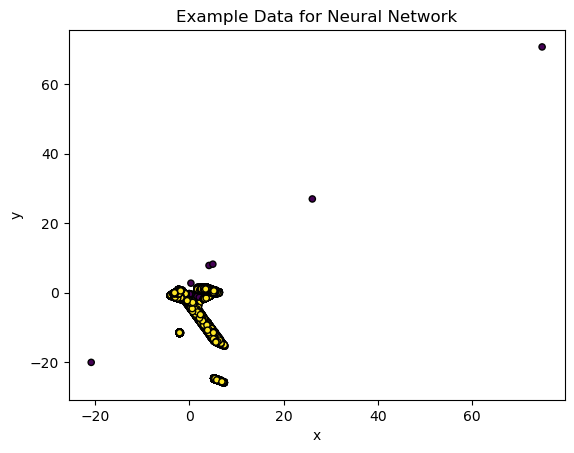

In [45]:
import time

start = time.time()
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Plot
plt.title("Example Data for Neural Network")
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], s=20, c=y_train_resampled, edgecolor='k')
plt.xlabel("x")
plt.ylabel("y")
plt.show()
end = time.time()

print(end-start, "seconds")

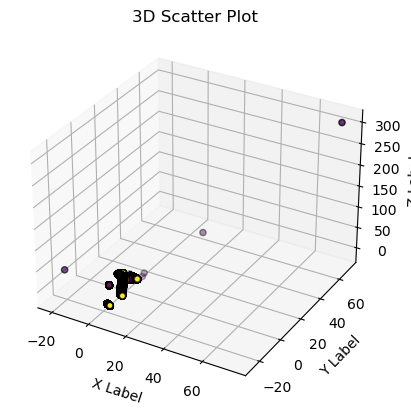

In [49]:
start = time.time()
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca[:,0], X_train_pca[:,1], X_train_pca[:,2], s=20, c=y_train_resampled, edgecolor='k')

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

# Show plot
plt.show()

end = time.time()

print(end-start, "seconds")

## 5.Modelling With LogReg

### 5.1 Baseline Modelling

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
import time
# Initialize the logistic regression model
# Initialize the logistic regression model
baseline_logreg = LogisticRegression(verbose = 1, n_jobs=-1, random_state=42)

start = time.time()

# Train the model
baseline_logreg.fit(X_train_scaled, y_train_resampled)

end=time.time()
print(end-start, "seconds")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.


12.133283615112305 seconds


In [251]:
# Predict on the training set
y_pred_train = baseline_logreg.predict(X_train_scaled)

# Calculate accuracy, recall, and other metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train)
roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)
print("Train ROC AUC Score:", roc_auc_train)

Train Accuracy: 0.973243229083267
Train Recall: 0.9468384432665693
Train F1-score: 0.9725175611723011
Train ROC AUC Score: 0.973243229083267


In [252]:
# Make predictions on the test set
y_pred = baseline_logreg.predict(X_test_scaled)
y_proba = baseline_logreg.predict_proba(X_test_scaled)[:,1]

In [253]:
# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred)

# Calculate recall
recall_test = recall_score(y_test, y_pred)

# Calculate F1 score
f1_test = f1_score(y_test, y_pred)

# Calculate ROC AUC score
roc_auc_test = roc_auc_score(y_test, y_proba)

In [254]:
print("Test Accuracy:", accuracy_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)
print("Test ROC AUC Score:", roc_auc_test)

Test Accuracy: 0.9865658954552677
Test Recall: 0.8735703796003739
Test F1-score: 0.9311555246347479
Test ROC AUC Score: 0.9367036409888867


In [255]:
results = np.array([accuracy_train, accuracy_train, recall_train, recall_test]).reshape(-1, 4)

In [256]:
# Creating a DataFrame with the metrics_train list and setting the index
metrics_df = pd.DataFrame(results,columns=["Train Accuracy","Test Accuracy", "Train Recall", "Test Recall"],index=["LogReg_SMOTE"])

# Printing the DataFrame
print(metrics_df)

              Train Accuracy  Test Accuracy  Train Recall  Test Recall
LogReg_SMOTE        0.973243       0.973243      0.946838      0.87357


#### Interpretation of Baseline Model 

We will use `statsmodels` to interpret the coefficients and their significance

In [257]:
# Interpret coefficients and p-value using stats models
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_scaled)  # Add a constant term for the intercept
logreg_stat = sm.Logit(y_train_resampled, X_train_sm)
result = logreg_stat.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.106209
         Iterations 20
                           Logit Regression Results                           
Dep. Variable:              PKT_CLASS   No. Observations:              2710342
Model:                          Logit   Df Residuals:                  2710319
Method:                           MLE   Df Model:                           22
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                  0.8468
Time:                        03:10:41   Log-Likelihood:            -2.8786e+05
converged:                       True   LL-Null:                   -1.8787e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0232      1.963     10.202      0.000      16.176      23.870
x1             0.2769      0

We will upadte the coefficients with their appropriate feature names.

In [258]:
# Extract coefficients and p-values
result_summary = result.summary().tables[1].data

# Create a DataFrame to store coefficients and their p-values
result_summary = pd.DataFrame(result_summary[1:], columns=['Features','Coefficient', 'Standard Error', 'Z-value', 'P-value', 'Lower CI', 'Upper CI'])
result_summary.iloc[1:, 0] = X_train.columns
# Convert coefficient and p-value columns to numeric
result_summary['Coefficient'] = pd.to_numeric(result_summary['Coefficient'])
result_summary['P-value'] = pd.to_numeric(result_summary['P-value'])

# Print the DataFrame
print(result_summary)

            Features  Coefficient Standard Error    Z-value  P-value  \
0              const      20.0232          1.963     10.202    0.000   
1           PKT_SIZE       0.2769          0.167      1.655    0.098   
2              FLAGS       0.0218          0.003      7.033    0.000   
3                FID      -0.1588          0.010    -15.790    0.000   
4         SEQ_NUMBER      -0.0241          0.004     -5.743    0.000   
5      NUMBER_OF_PKT      -0.5878          0.055    -10.650    0.000   
6     PKT_DELAY_NODE      -0.6410          0.029    -22.208    0.000   
7           PKT_RATE       8.3281          0.253     32.862    0.000   
8          BYTE_RATE       1.3855          0.786      1.763    0.078   
9        UTILIZATION      -3.1891          0.197    -16.228    0.000   
10         PKT_DELAY       1.8348          0.021     86.835    0.000   
11  PKT_RESEVED_TIME       0.0165          0.005      3.072    0.002   
12    FIRST_PKT_SENT      -7.2676          1.479     -4.915    0

In [259]:
results_df=result_summary[['Features', 'Coefficient', 'P-value']]

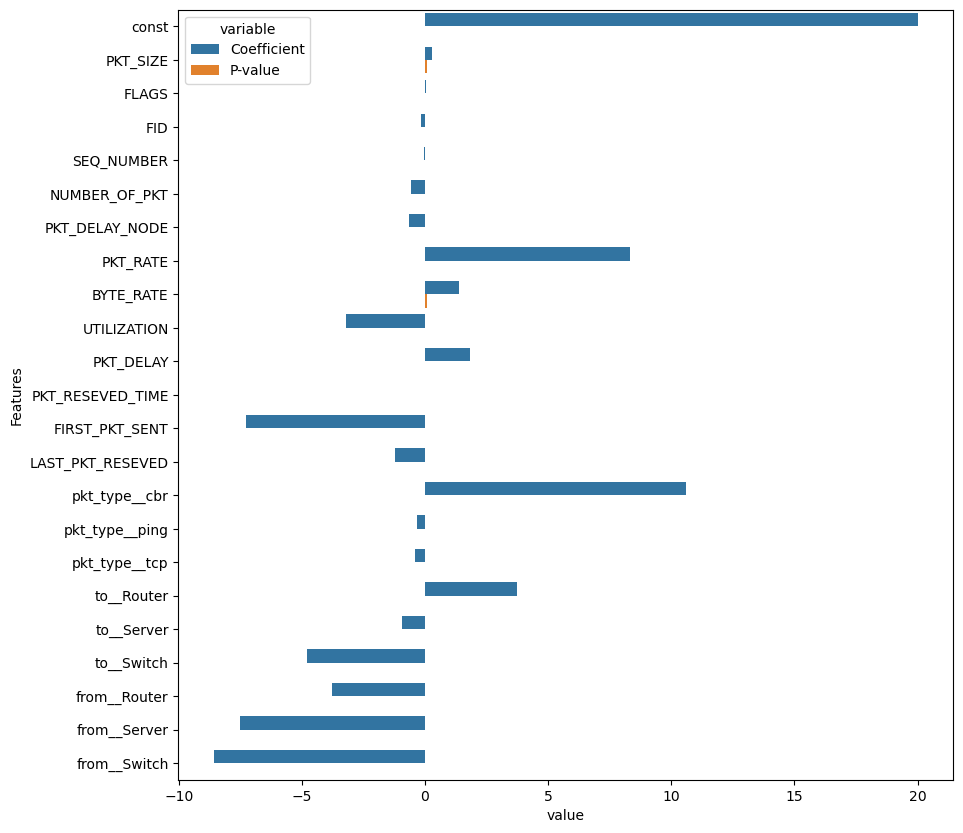

In [260]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 10))

sns.barplot(x='value', y='Features',hue='variable', data=pd.melt(results_df, id_vars='Features') )
#plt.xlim(-1.1, 1.1)
    
plt.show()

<font color='red'><b>Insights:</b></font>
* As expected `BYTE_RATE`, `PKT_RATE`, `Number_OF_PKT`, `Utilisation`, `PKT_DELAY` are strong predictor of the malicious traffic (p-valye=~0)
* Surprisingly `pkt_cbr` is a strong predictor
* Newly created dummy variables (to_Router, to_Server, to_Switch, from_Router, from_Server, from_Switch) showed high predicitve power

#### Performance Evaluation of Baseline Model

In [261]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Normal Traffic", "Predicted Malicious Traffic"],
    index=["True Normal Traffic", "True Malicious Traffic"]
)

Let's see the confusion matrix

<AxesSubplot: >

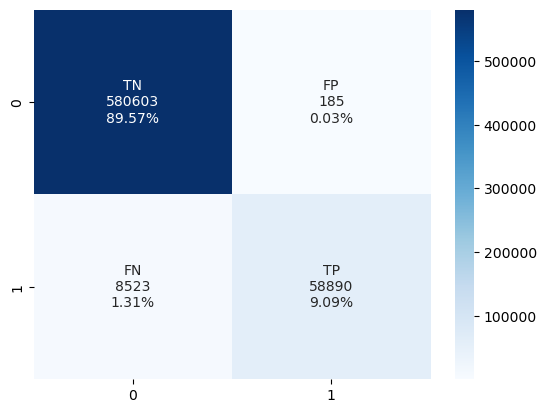

In [262]:
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

We can see that FN rate is quite high. ***This metric is of high importance as it's accountable for the malicious traffic that were marked as normal.***
Let's closer see the metrics of the positive class.

In [263]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# First calculate precision and recall using the default (0.5) cut-off
y_threshold = np.where(y_proba > 0.5, 1, 0)

In [264]:
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")
print(f"F1-score: {f1_score(y_test, y_threshold)}")
print("")

Threshold of 0.5:
Precision score: 0.9968683876428269
Recall score: 0.8735703796003739
F1-score: 0.9311555246347479



`Recall` score is **87.35%** which represents the proportion of actual positive cases that were correctly identified by a classification model out of all actual positive cases in the dataset.

In [265]:
from sklearn.metrics import accuracy_score

# Vary thresholds by 0 from 0.05 to 0.95
thresholds = np.arange(0, 0.99, 0.05)

precisions = list()
recalls = list()

start=time.time()
for threshold in thresholds:

    # Apply threshold
    y_threshold = np.where(y_proba > threshold, 1, 0)

    # Calculate precision and recall
    precision = precision_score(y_test, y_threshold)
    recall = recall_score(y_test, y_threshold)

    # Append to list
    precisions.append(precision)
    recalls.append(recall)
    
end=time.time()
print (end-start, "seconds")

4.275933504104614 seconds


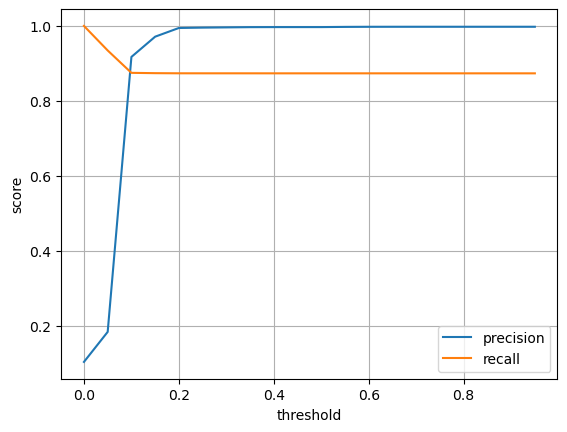

In [266]:
# Visualize the result
plt.figure()
plt.plot(thresholds, precisions, label='precision')
plt.plot(thresholds, recalls, label='recall')
plt.xlabel('threshold')
plt.ylabel('score')
plt.grid()
plt.legend()
plt.show()

Any `threshold` between ~ 0.1 and ~ 0.9 gives the same precision and recall rates. So, lowering the `threshold` **would not give us better recall rate**.  

***The True Positive Rate (TPR)*** measures what proportion of a model assigned to positive are actually members of the positive class:

In [267]:
#y_proba = baseline_logreg.predict_proba(X_test_scaled)[:,1]
y_binary = np.where(y_proba > 0.5, 1, 0)

TPR = recall_score(y_test, y_binary)
print(f"TPR: {TPR}")

TPR: 0.8735703796003739


**Basically, it's our Recall.**

On the other hand, the ***False Positive Rate (FPR)*** will be the proportion of all negatives that we incorrectly identified as positive, that is:

In [268]:
def false_positive_rate(y_true, y_pred):

    false_positives = (y_true == 0) & (y_pred == 1) # find all values where y is negative
                                                    # but we predicted positive
    false_positive_number = false_positives.sum()

    true_negatives = (y_true == 0) & (y_pred == 0)  # find all values where y is negative
                                                    # and we predicted negative
    true_negative_number = true_negatives.sum()

    # Finally, find the ratio of (FP) to (TN + FP)
    FPR = false_positive_number/(true_negative_number + false_positive_number)

    return FPR

In [269]:
#y_proba = baseline_logreg.predict_proba(X_test_scaled)[:,1]
y_binary = np.where(y_proba > 0.5, 1, 0)

FPR = false_positive_rate(y_test, y_binary)
print(f"FPR: {FPR}")

FPR: 0.0003185327520541058


In [270]:
thresholds = np.linspace(0, 1, 100)

# Iterate over the thresholds and compute the positive and negative recall
true_positive_rates = []
false_positive_rates = []

thresholds = np.linspace(0, 1, 50)
for threshold in thresholds:

    # Apply the cutoff and calculate the positive and negative recall
    y_pred = np.where(y_proba > threshold, 1, 0)

    tpr = recall_score(y_test, y_pred)
    fpr = false_positive_rate(y_test, y_pred)

    true_positive_rates.append(tpr)
    false_positive_rates.append(fpr)

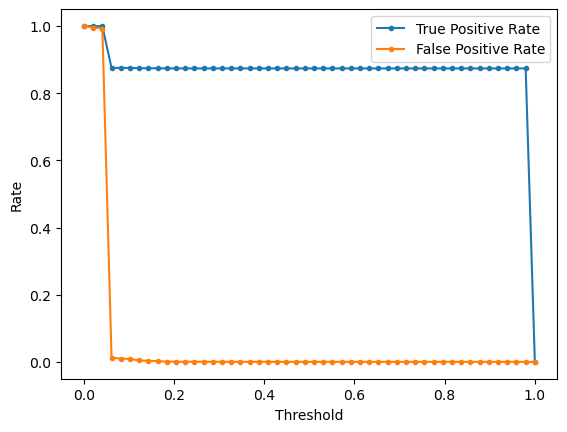

In [271]:
plt.figure()
plt.plot(thresholds, true_positive_rates, label='True Positive Rate', marker='.')
plt.plot(thresholds, false_positive_rates, label='False Positive Rate', marker='.')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.show()

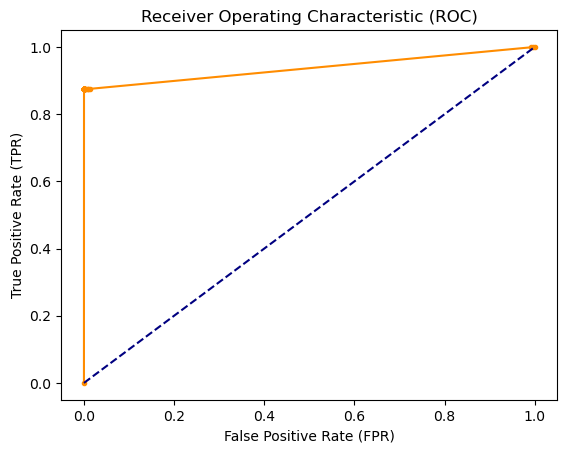

In [272]:
# True positive rate (TPR) = recall
tprs = np.array(true_positive_rates)

# False positive rate (FPR)
fprs = np.array(false_positive_rates)

plt.figure()
plt.plot(fprs, tprs, color='darkorange', marker='.')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.show()

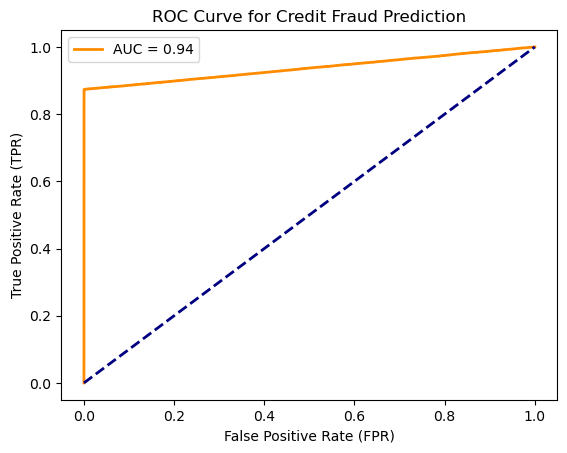

Area under curve (AUC):0.9367036409888867



In [273]:
from sklearn.metrics import roc_curve, roc_auc_score

fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Credit Fraud Prediction')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print()

It indicates that the model is very effective at distinguishing between the positive and negative classes, ***with a high true positive rate (TPR) and a low false positive rate (FPR)***.

An AUC value of `0.94` indicates the probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance.

**Summary of baseline model evaluation:**

* Accuracy is 98.66%
* Recall is 87.35%
* AUC score is 94%
* F1 score is 93.14%

These will be the key metrics we would like to improve with advanced models in Sprint 3. ***The main focus will be at Recall as the impact of misclassifying malicious attack is paramount.***

### 5.2 Analysis of False Negative Values

In [96]:
y_pred = np.where(y_proba > 0.5, 1, 0)

In [97]:
false_negatives = X_test[(y_pred==0) & (y_test==1)]

In [98]:
# Export DataFrame to CSV
false_negatives.to_csv('false_negatatives.csv', index=False)  # Set index=False to exclude row numbers in the CSV

In [99]:
false_negatives.shape

(8523, 22)

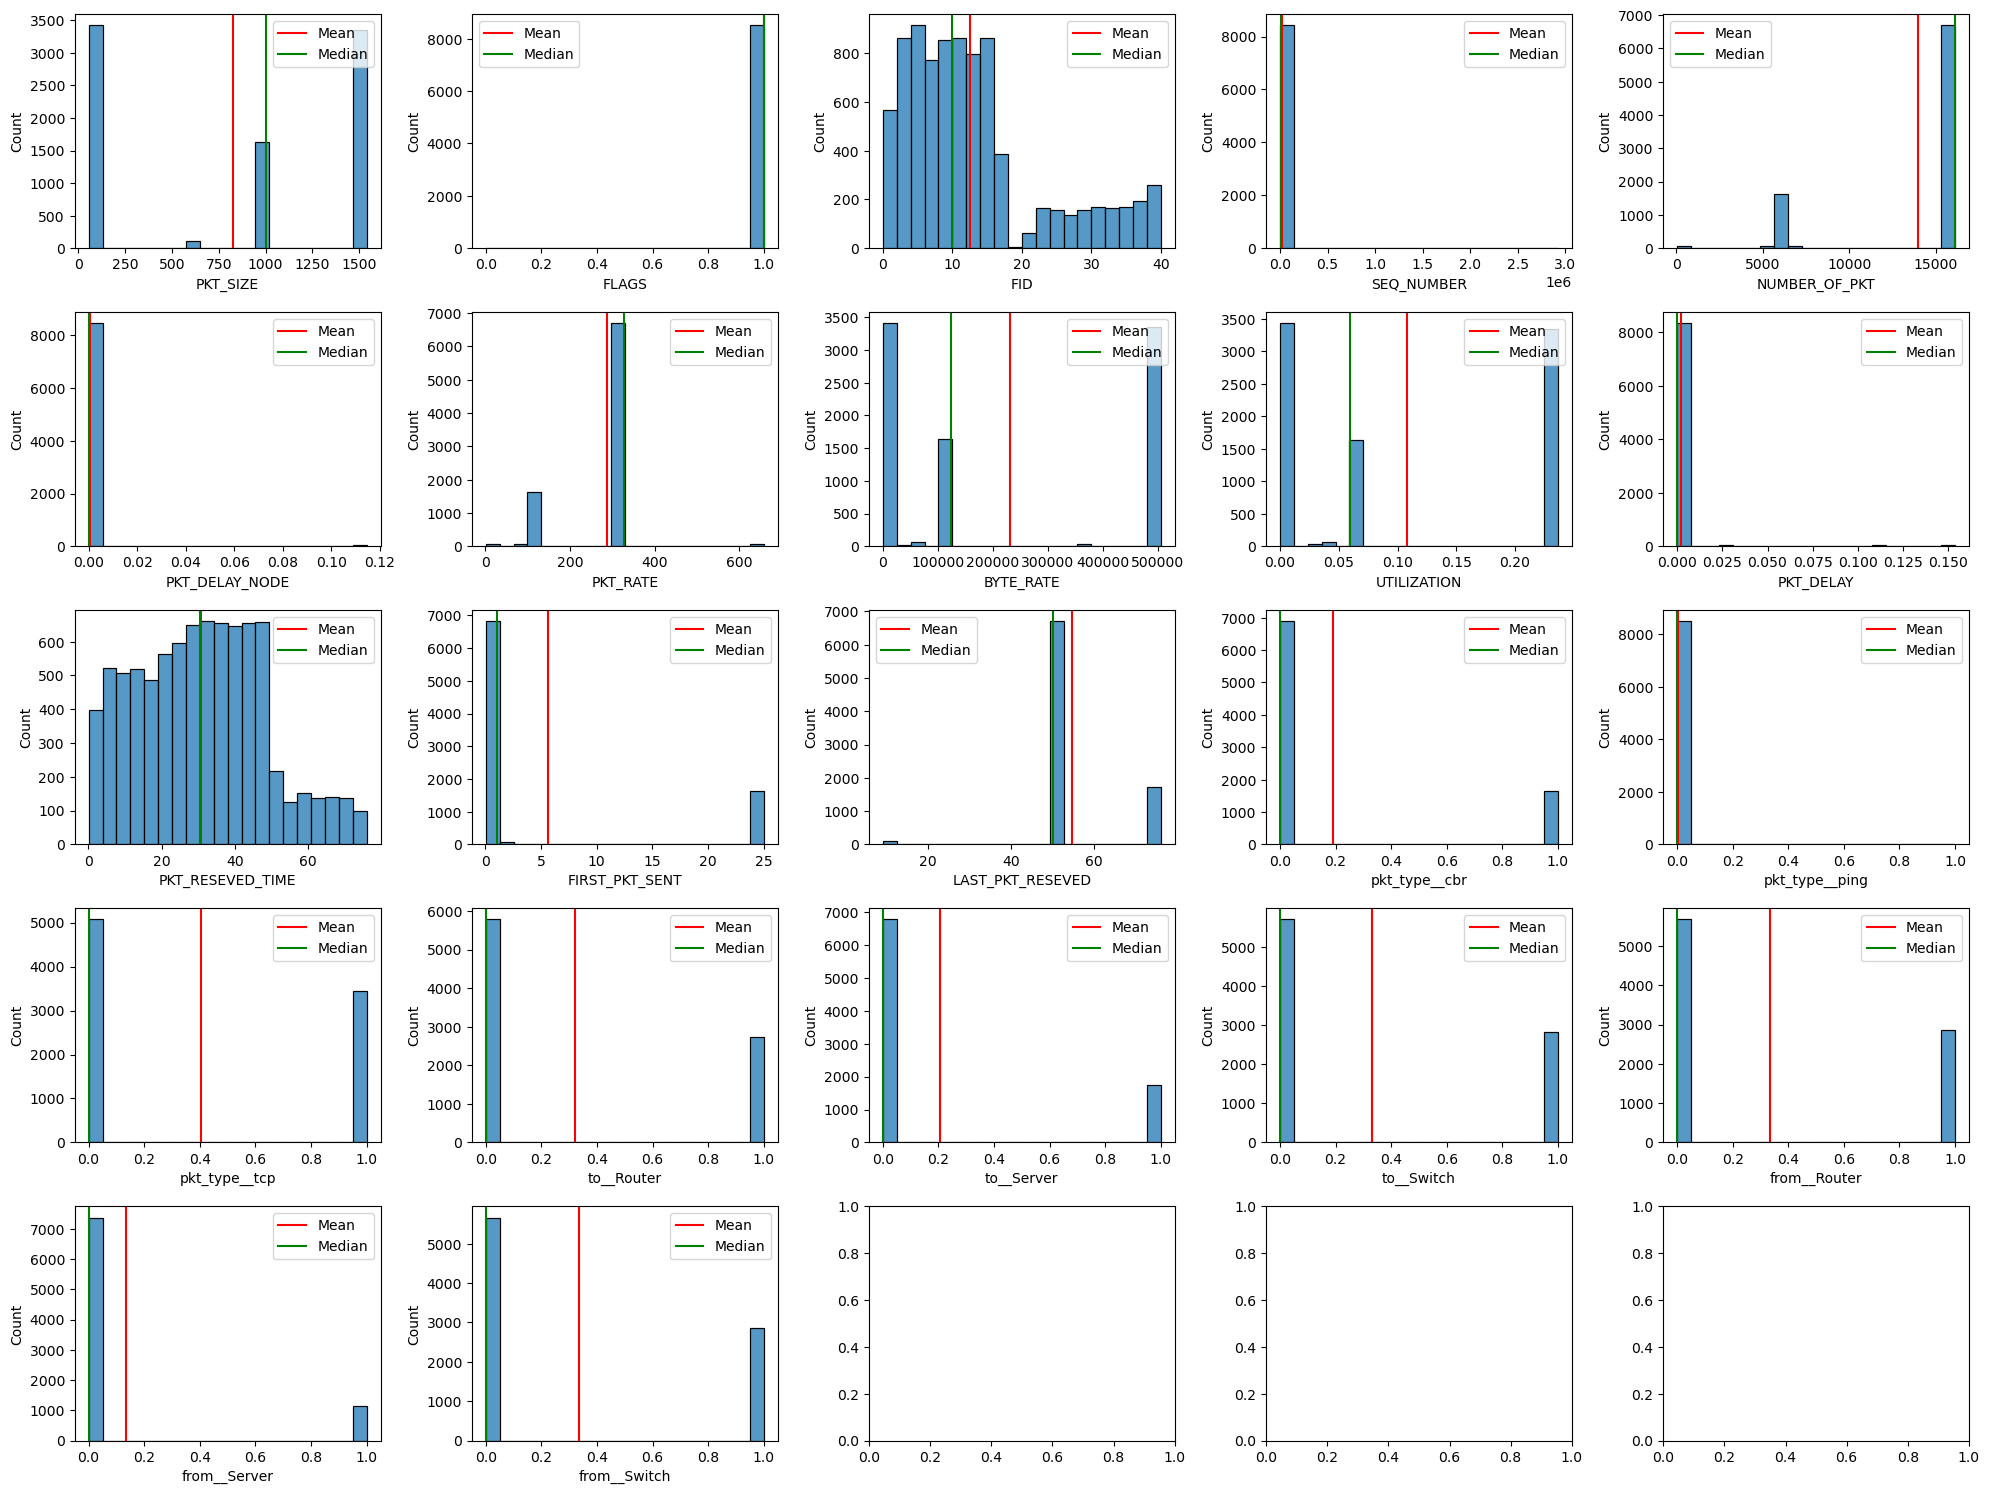

Execution time: 16.27310585975647 seconds


In [100]:
import time

# Record the start time
start_time = time.time()
# visualize distribution of unscaled data in each feature
col_names = false_negatives.columns
plot_num = 1

plt.subplots(5,5, figsize=(20,15))

for col in col_names:
    # Save column values, mean, and median to variables
    var_mean = false_negatives[col].mean()
    var_median = false_negatives[col].median()
    
    plt.subplot(5,5,plot_num)
    sns.histplot(false_negatives[col],bins=20)
    #sns.displot(var)
    plt.axvline(var_mean, c='r', label='Mean')
    plt.axvline(var_median, c='g', label='Median')
    plt.legend()
    
    plot_num +=1
    
plt.tight_layout()
plt.show()

# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

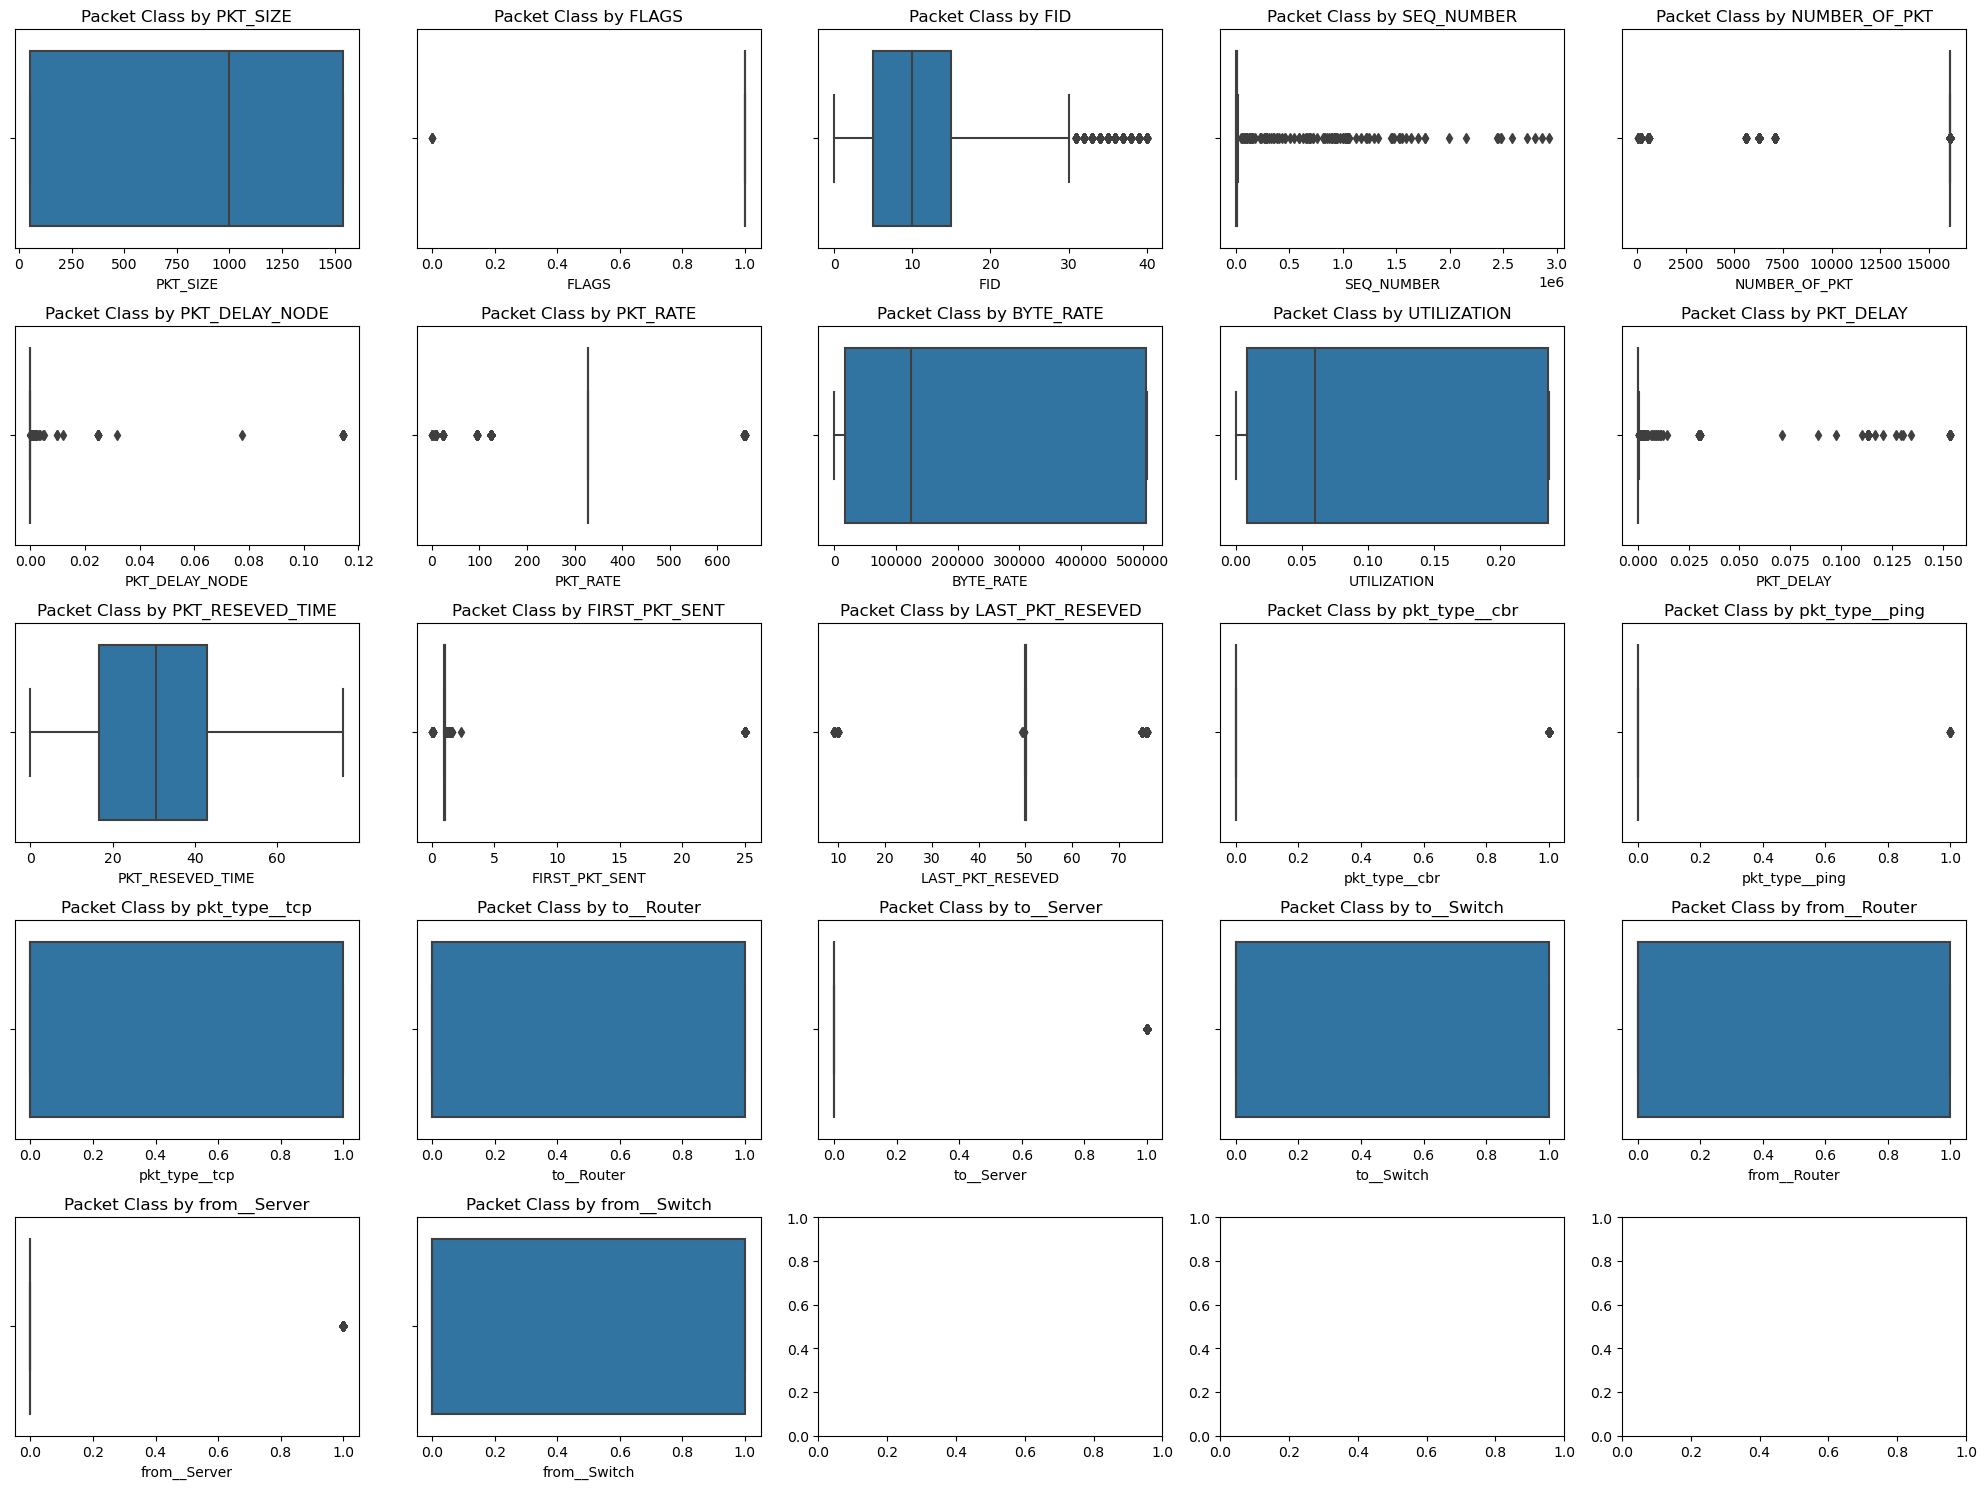

In [102]:
plot_num = 1
plt.subplots(5,5, figsize=(20,15))

for col in false_negatives:
    plt.subplot(5,5,plot_num)
    plot_num +=1
    sns.boxplot(x=col, data=false_negatives)
    plt.title(f'Packet Class by {col}')
    
plt.tight_layout()
plt.show()

### 5.3 Hyperparameter Tuning For LogReg

In [274]:
from sklearn.model_selection import cross_val_score
import time

We don't need to do a train and validation split with the remainder of the data. Cross-validation will do that for us!

We can see the cross validation scores of a particular model like logistic regression (with the default settings):

Looking for the optimal regularization (C)

In [275]:
import time
import numpy as np
import matplotlib.pyplot as plt    
    #EXPERIMENT 1: 5-fold cross validation ###

cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

start = time.time()

#Do some cross validation
for c in C_range:
        LR_model = LogisticRegression(C=c,random_state=1,n_jobs=-1)
        cv_score = np.mean(cross_val_score(LR_model, X_train_scaled, y_train_resampled, cv = 5, n_jobs=-1))
        cross_validation_scores.append(cv_score)

end = time.time()

print(end-start, "seconds")

222.5429084300995 seconds


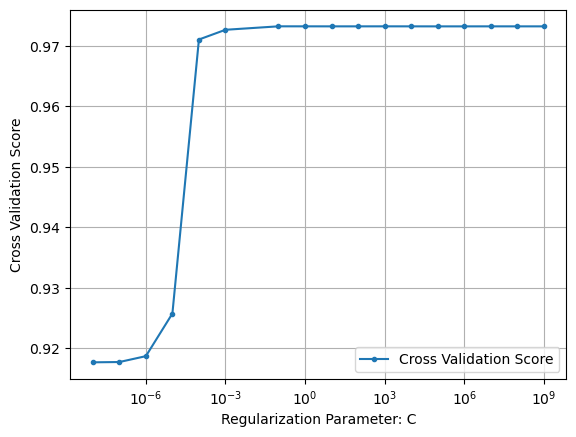

The best model has C =  0.1


In [276]:
plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

#### Gridsearch

In [277]:
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
# Set up a directory to cache the pipeline results - if the same step with the same parameters is called again, the cached result is used instead of re-computing it.
cachedir = mkdtemp()

# Set up a pipeline
# The steps here act as placeholders and will be changed when we pass the pipeline into the grid search later
my_pipeline = Pipeline(steps=[
                        ('scaler', StandardScaler()),
                        ('dim_reducer', PCA()),
                        ('model', LogisticRegression())],
                        memory=cachedir)

In [278]:
# Let's try the same range of C values from earlier
c_values = [.001, .001, .1, 1, 10, 100, 1000]

# Parameter grid
logreg_param_grid = [

    # l1 with PCA
    {'scaler': [StandardScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.8],
     'model': [LogisticRegression(solver='saga',penalty='l1', random_state=1, n_jobs=-1, max_iter=100000)],
     'model__C': c_values},


    # l2 (default) with PCA
    {'scaler': [StandardScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.8],
     'model': [LogisticRegression(penalty='l2',random_state=1, n_jobs=-1, max_iter=100000)],
     'model__C': c_values}
]

In [279]:
start = time.time()
# Instantiate the log reg grid search
logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5, n_jobs=-1, verbose=1, scoring=['recall', 'accuracy'], refit='recall')

# Fit the log reg grid search
logreg_gs.fit(X_train_resampled, y_train_resampled)

end=time.time()
print(end-start, "seconds")

Fitting 5 folds for each of 28 candidates, totalling 140 fits
249.29852771759033 seconds


In [280]:
# Retrieve best parameters and score
print("Best Parameters:", logreg_gs.best_params_)
print("Best Score:", logreg_gs.best_score_)

Best Parameters: {'dim_reducer': PCA(), 'dim_reducer__n_components': 0.95, 'model': LogisticRegression(max_iter=100000, n_jobs=-1, random_state=1), 'model__C': 100, 'scaler': StandardScaler()}
Best Score: 0.9465772160837892


In [281]:
# Predict on the training set
y_pred_train = logreg_gs.predict(X_train_scaled)

# Calculate accuracy, recall, and other metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train)
roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)
print("Train ROC AUC Score:", roc_auc_train)

Train Accuracy: 0.9276268456157931
Train Recall: 0.8735015728642364
Train F1-score: 0.9234854761425533
Train ROC AUC Score: 0.9276268456157931


In [282]:
logreg_gs.best_estimator_

Pipeline(memory='C:\\Users\\askha\\AppData\\Local\\Temp\\tmp0u5vsdsc',
         steps=[('scaler', StandardScaler()),
                ('dim_reducer', PCA(n_components=0.95)),
                ('model',
                 LogisticRegression(C=100, max_iter=100000, n_jobs=-1,
                                    random_state=1))])

In [283]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
# Get the best estimator from the grid search
best_estimator = logreg_gs.best_estimator_

# Predict on the test set
y_pred = best_estimator.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Test Accuracy:", accuracy_test)
print("Test Recall:", recall_test)
print("Test F1:", f1)
print("Test ROC AUC:", roc_auc)

Test Accuracy: 0.9707158736256192
Test Recall: 0.874490083515049
Test F1: 0.8613298657276858
Test ROC AUC: 0.9281875199078995


In [284]:
metrics_df.loc['LogRegOpt_SMOTE']=[accuracy_train, accuracy_test, recall_train,recall_test]
metrics_df

,Train Accuracy,Test Accuracy,Train Recall,Test Recall
LogReg_SMOTE,0.973243,0.973243,0.946838,0.87357
LogRegOpt_SMOTE,0.927627,0.970716,0.873502,0.87449


### 6 XGBoost

We don't basically need pca and scaling for tree based algorithms

#### A. Experimenting With Number of Estimators

In [289]:
import time
# tried to set parameter scorrer = `recall` which resulted in poor performance for accuracy, ~10%. Thefore we will stick to default scorer - `accuracy`

#Fitting 5 folds for each of 49 candidates, totalling 245 fits
#223.84202194213867 seconds

start=time.time()
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

my_xgb = XGBClassifier(n_jobs=-1)

param = {'n_estimators': np.arange(1, 100, 5)}

# Define the list of scoring metrics
scoring = ['accuracy', 'recall']

grid_xgb = GridSearchCV(my_xgb, param_grid=param, verbose=1, n_jobs=-1, cv=5, scoring=scoring, refit='recall')

grid_xgb.fit(X_train_resampled, y_train_resampled)

end=time.time()
print(end-start, "seconds")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
179.6302945613861 seconds


In [290]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, precision_score
# Predict on the training set
y_pred_train = grid_xgb.predict(X_train_resampled)

# Calculate accuracy, recall, and other metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train)
roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)
print("Train ROC AUC Score:", roc_auc_train)

Train Accuracy: 0.9863891715510441
Train Recall: 0.9729591320947688
Train F1-score: 0.9862038892391831
Train ROC AUC Score: 0.9863891715510441


In [291]:
grid_xgb.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'])

In [292]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "n_estimators": grid_xgb.cv_results_["param_n_estimators"],
    'mean_accuracy_score': grid_xgb.cv_results_["mean_test_accuracy"],
    'mean_recall_score': grid_xgb.cv_results_["mean_test_recall"]
})

results_df.head()

,n_estimators,mean_accuracy_score,mean_recall_score
0,1,0.973479,0.947095
1,6,0.974137,0.948467
2,11,0.975385,0.950955
3,16,0.978154,0.956496
4,21,0.980298,0.960778


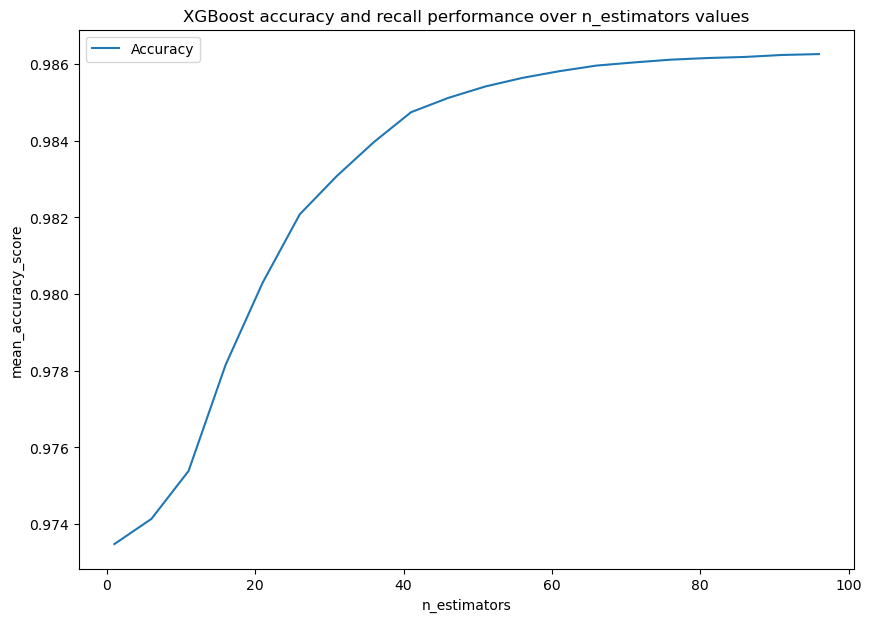

In [293]:
plt.figure(figsize=(10, 7))

# Plot the first line for mean_accuracy_score
sns.lineplot(x="n_estimators", y="mean_accuracy_score", data=results_df, label="Accuracy")

plt.title("XGBoost accuracy and recall performance over n_estimators values")

plt.show()

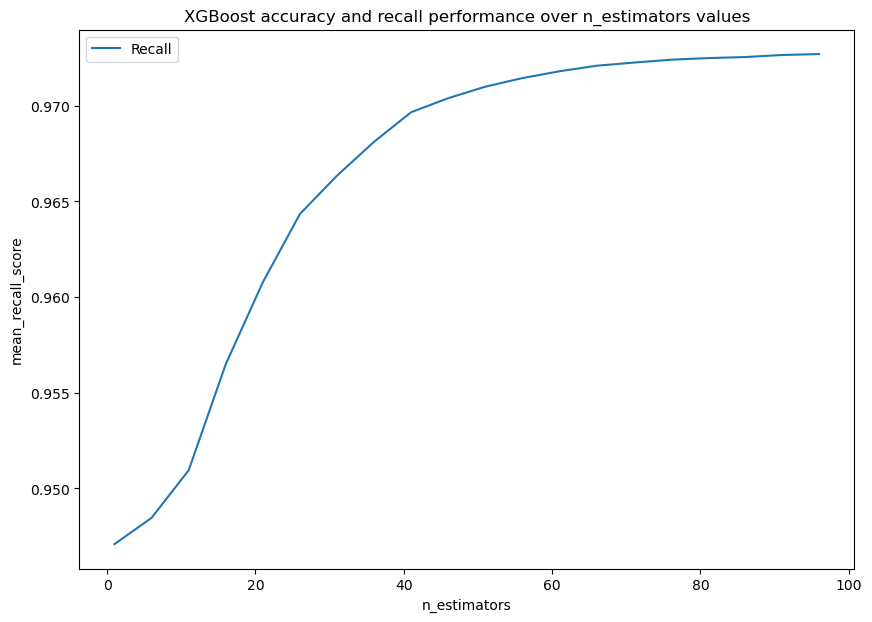

In [294]:
plt.figure(figsize=(10, 7))

# Plot the second line for mean_recall_score
sns.lineplot(x="n_estimators", y="mean_recall_score", data=results_df, label="Recall")

plt.title("XGBoost accuracy and recall performance over n_estimators values")

plt.show()

In [182]:
results_df

,n_estimators,mean_accuracy_score,mean_recall_score
0,1,0.973479,0.947095
1,6,0.974137,0.948467
2,11,0.975385,0.950955
3,16,0.978154,0.956496
4,21,0.980298,0.960778
5,26,0.982080,0.964346
6,31,0.983079,0.966349
7,36,0.983964,0.968120
8,41,0.984741,0.969666
9,46,0.985113,0.970398


We can take `n_estimators=40` as an optimal parameter, as increasing n_estimatros didn't provide much improvement in performance:
* accuracy: 98.47%
* recall: 96.97%

#### B. Experimenting With Maximum _Depth

In [295]:
start=time.time()
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

my_xgb = XGBClassifier(n_jobs=-1)

param = {'n_estimators': [40], 'max_depth': np.arange(1, 10, 2)}

grid_xgb = GridSearchCV(my_xgb, param_grid=param, verbose=1, n_jobs=-1, cv=5, scoring=scoring, refit='recall')

grid_xgb.fit(X_train_resampled, y_train_resampled)

end=time.time()
print(end-start, "seconds")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
40.36583590507507 seconds


In [296]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Predict on the training set
y_pred_train = grid_xgb.predict(X_train_resampled)

# Calculate accuracy, recall, and other metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train)
roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)
print("Train ROC AUC Score:", roc_auc_train)

Train Accuracy: 0.9861663214457806
Train Recall: 0.9725008873418927
Train F1-score: 0.9859746590735659
Train ROC AUC Score: 0.9861663214457805


In [297]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "max_depth": grid_xgb.cv_results_["param_max_depth"],
    'mean_accuracy_score': grid_xgb.cv_results_["mean_test_accuracy"],
    'mean_recall_score': grid_xgb.cv_results_["mean_test_recall"]
})

results_df.head()

,max_depth,mean_accuracy_score,mean_recall_score
0,1,0.935782,0.873262
1,3,0.974625,0.949389
2,5,0.983131,0.966434
3,7,0.985334,0.970847
4,9,0.986059,0.972305


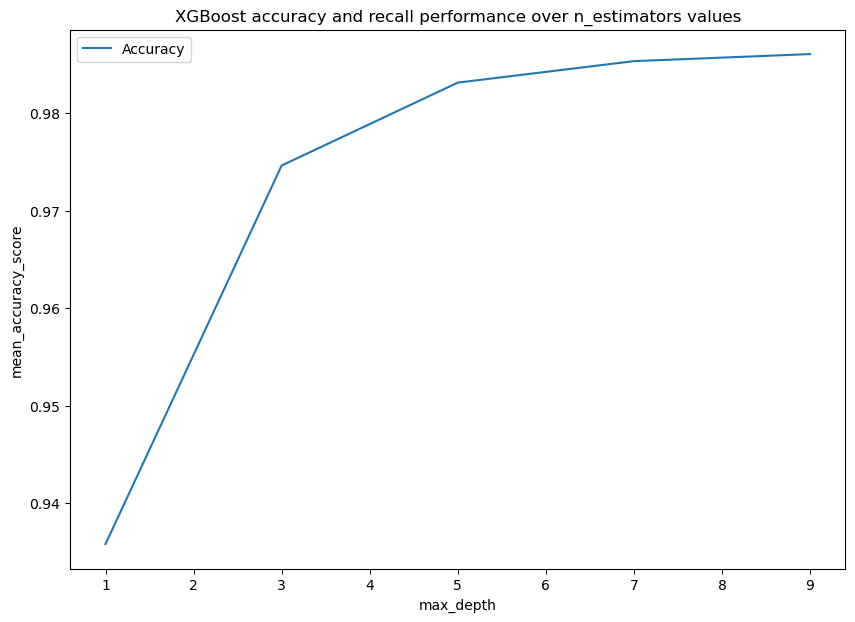

In [298]:
plt.figure(figsize=(10, 7))

# Plot the first line for mean_accuracy_score
sns.lineplot(x="max_depth", y="mean_accuracy_score", data=results_df, label="Accuracy")

plt.title("XGBoost accuracy and recall performance over n_estimators values")

plt.show()

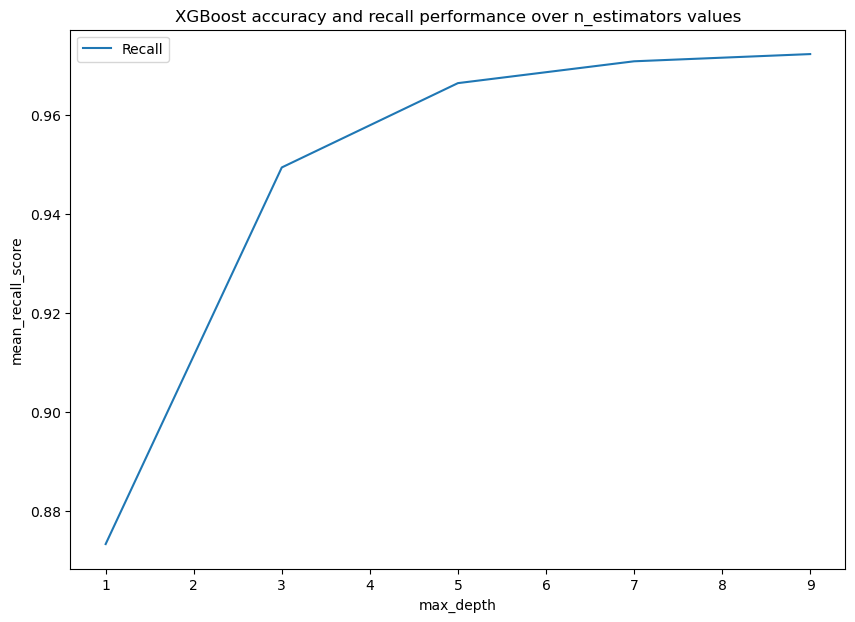

In [299]:
plt.figure(figsize=(10, 7))

# Plot the second line for mean_recall_score
sns.lineplot(x="max_depth", y="mean_recall_score", data=results_df, label="Recall")

plt.title("XGBoost accuracy and recall performance over n_estimators values")

plt.show()

In [300]:
results_df

,max_depth,mean_accuracy_score,mean_recall_score
0,1,0.935782,0.873262
1,3,0.974625,0.949389
2,5,0.983131,0.966434
3,7,0.985334,0.970847
4,9,0.986059,0.972305


So, the best `max_depth parameter is 5`. Further increase of depth didn't provide much improvement in model accuracy and recall.

#### C. Experimenting With Learning Rate

In [301]:
start=time.time()
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

my_xgb = XGBClassifier(n_jobs=-1)

param = {'n_estimators': [40], 'max_depth': [5], 'learning_rate': np.arange(0.1, 1, 0.05)}

grid_xgb = GridSearchCV(my_xgb, param_grid=param, verbose=1, n_jobs=-1, cv=5, scoring=scoring, refit='recall')

grid_xgb.fit(X_train_resampled, y_train_resampled)

end=time.time()
print(end-start, "seconds")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
136.692058801651 seconds


In [302]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Predict on the training set
y_pred_train = grid_xgb.predict(X_train_resampled)

# Calculate accuracy, recall, and other metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train)
roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)
print("Train ROC AUC Score:", roc_auc_train)

Train Accuracy: 0.9861545148176872
Train Recall: 0.972673559277759
Train F1-score: 0.9859653138375138
Train ROC AUC Score: 0.9861545148176872


In [303]:
grid_xgb.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'])

In [304]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "max_depth": grid_xgb.cv_results_["param_max_depth"],
    'mean_accuracy_score': grid_xgb.cv_results_["mean_test_accuracy"],
    'mean_recall_score': grid_xgb.cv_results_["mean_test_recall"],
    'param_learning_rate': grid_xgb.cv_results_["param_learning_rate"]
})

results_df

,max_depth,mean_accuracy_score,mean_recall_score,param_learning_rate
0,5,0.973632,0.947414,0.1
1,5,0.975394,0.950936,0.15
2,5,0.978686,0.957523,0.2
3,5,0.981591,0.963335,0.25
4,5,0.983131,0.966434,0.3
5,5,0.984270,0.968702,0.35
6,5,0.985061,0.970315,0.4
7,5,0.985402,0.970986,0.45
8,5,0.985628,0.971479,0.5
9,5,0.985737,0.971699,0.55


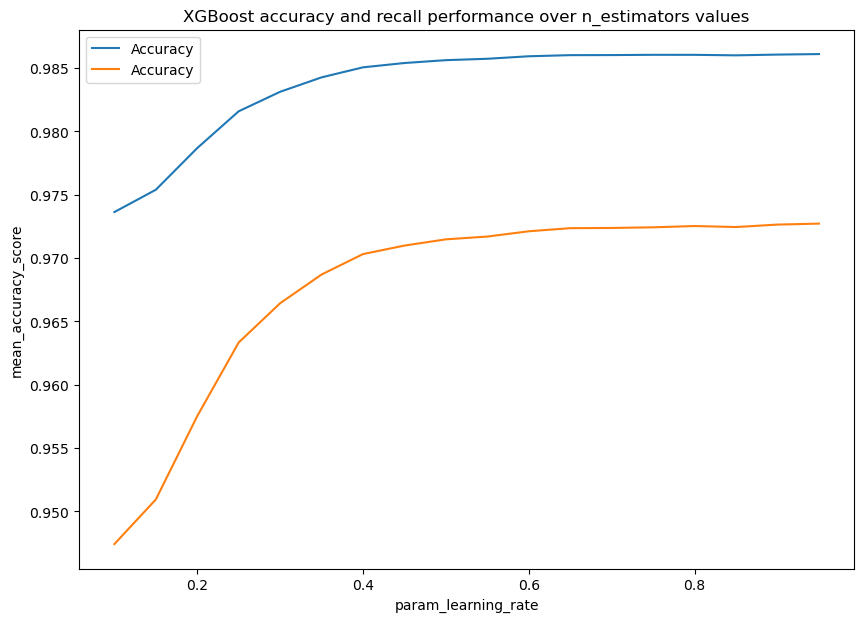

In [305]:
plt.figure(figsize=(10, 7))

# Plot the first line for mean_accuracy_score
sns.lineplot(x="param_learning_rate", y="mean_accuracy_score", data=results_df, label="Accuracy")

sns.lineplot(x="param_learning_rate", y="mean_recall_score", data=results_df, label="Accuracy")

plt.title("XGBoost accuracy and recall performance over n_estimators values")

plt.show()

**The best learning rate would be at 0.4**

#### D. Experimenting With Objective Function

In [306]:
start=time.time()
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

my_xgb = XGBClassifier(n_jobs=-1)

param ={'X_train_resampledtors': [40], 'max_depth': [5], 'learning_rate':[0.4], 'objective': ['binary:logistic', 'binary:logitraw']}

grid_xgb = GridSearchCV(my_xgb, param_grid=param, verbose=1, n_jobs=-1, cv=5, scoring=scoring, refit='recall')

grid_xgb.fit(X_train_resampled, y_train_resampled)

end=time.time()
print(end-start, "seconds")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
39.843833923339844 seconds


In [307]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Predict on the training set
y_pred_train = grid_xgb.predict(X_train_resampled)

# Calculate accuracy, recall, and other metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train)
roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)
print("Train ROC AUC Score:", roc_auc_train)

Train Accuracy: 0.9863555964524034
Train Recall: 0.9729237122104886
Train F1-score: 0.9861698312263901
Train ROC AUC Score: 0.9863555964524034


In [308]:
grid_xgb.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_X_train_resampledtors', 'param_learning_rate', 'param_max_depth', 'param_objective', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'])

In [309]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "max_depth": grid_xgb.cv_results_["param_max_depth"],
    'mean_accuracy_score': grid_xgb.cv_results_["mean_test_accuracy"],
    'mean_recall_score': grid_xgb.cv_results_["mean_test_recall"],
    'param_learning_rate': grid_xgb.cv_results_["param_learning_rate"],
    'param_objective': grid_xgb.cv_results_["param_objective"]
})

results_df.head(5)

,max_depth,mean_accuracy_score,mean_recall_score,param_learning_rate,param_objective
0,5,0.986245,0.972705,0.4,binary:logistic
1,5,0.986027,0.972227,0.4,binary:logitraw


We can see that `binary:logistic` (default) showed slightly better performance.

#### E. Testing With The Best Hyperparameters

In [310]:
start=time.time()
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

my_xgb = XGBClassifier(n_jobs=-1)

param = {'n_estimators': [40], 'max_depth': [5], 'learning_rate':[0.4]}

grid_xgb = GridSearchCV(my_xgb, param_grid=param, verbose=1, n_jobs=-1, cv=5, scoring=scoring, refit='recall')

grid_xgb.fit(X_train_resampled, y_train_resampled)

end=time.time()
print(end-start, "seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
14.00030255317688 seconds


In [311]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Predict on the training set
y_pred_train = grid_xgb.predict(X_train_resampled)

# Calculate accuracy, recall, and other metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train)
roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)
print("Train ROC AUC Score:", roc_auc_train)

Train Accuracy: 0.9850967147319416
Train Recall: 0.9703565085144237
Train F1-score: 0.9848737506979316
Train ROC AUC Score: 0.9850967147319416


In [312]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Predict on the training set
y_pred_test = grid_xgb.predict(X_test)

# Calculate accuracy, recall, and other metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)

print("Test Accuracy:", accuracy_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)
print("Test ROC AUC Score:", roc_auc_test)

Test Accuracy: 0.9867124549329606
Test Recall: 0.8735407117321585
Test F1-score: 0.9318532467224204
Test ROC AUC Score: 0.9366945967250502


In [313]:
metrics_df.loc['XGBoostOpt_SMOTE'] = [accuracy_train, accuracy_test, recall_train, recall_test]
metrics_df

,Train Accuracy,Test Accuracy,Train Recall,Test Recall
LogReg_SMOTE,0.973243,0.973243,0.946838,0.873570
LogRegOpt_SMOTE,0.927627,0.970716,0.873502,0.874490
XGBoostOpt_SMOTE,0.985097,0.986712,0.970357,0.873541


The table shows performance of 3 models: `LogReg`, `LogRegOpt` - with hyperparameter tuning and `XGBoostOpt` - hyperparameter tunning applied.

In [317]:
metrics_df.to_csv('Smote.csv')

The evaluation results were exported into the CSV file for further analysis.